# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
+ Formulas for the Bernoulli distribution: https://en.wikipedia.org/wiki/Bernoulli_distribution

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [4]:
# number of callbacks for white-sounding names
print(sum(data[data.race=='w'].call))

# number of callbacks for black-sounding names
print(sum(data[data.race=='b'].call))

235.0
157.0


In [5]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


<div class="span5 alert alert-success">
<p>Your answers to Q1 and Q2 here</p>
</div>

Since we do not know the population standard deviation and since we wish to determine if there is, indeed, a difference in call back rates between two samples (i.e. between black sounding names and white sounding names) the appropriate test statistic to use in this case would be a two-sample T-test.

The Central Limit Theorem applies whenever you take a series of samples from a population. In this case, the data we are working with is only one of those samples (of size n = 4,870) so the tendency to see a normally distributed sample distribution regardless of the underlying population proportion will not be tested here.

The null and hypothesis in this case would be that there is no difference in call back rates for black sounding names and white sound names.

The alternate hypothesis is to reject the null hypothesis and to posit that there is, indeed, a difference in call back rates between black sounding names and white sounding names.

The margin of error is: 0.0076425159626891176
The upper bound of our 95% confidence interval is 0.0881353328281333 degrees F
The lower bound of our 95% confidence interval is 0.07285030090275507 degrees F


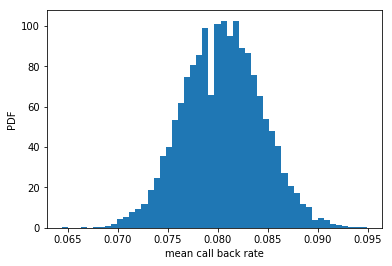

The confidence interval is: [0.07289527 0.08809035]
The margin of error is: 0.0076306570782409345


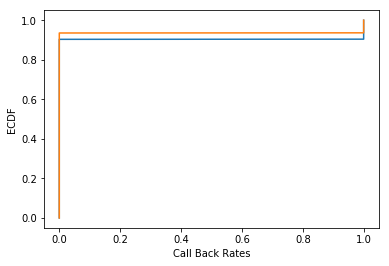

p-value = 0.0001


In [9]:
# Separate out the white sounding names from the call back data: w
w = data[data.race=='w'].call

# Separate out the black sounding names from the call back data: b
b = data[data.race=='b'].call

# First, let's do the analysis using the frequentist approach.

# Estimate the upper and lower bounds of a 95% confidence interval using a one-sample t-statistic.
sample_mean = np.mean(np.concatenate((w, b)))
t_star = 1.9604
sample_sd = np.std(np.concatenate((w, b)))
n = len(np.concatenate((w, b)))

plus = sample_mean + t_star * (sample_sd / np.sqrt(n))
minus = sample_mean - t_star * (sample_sd / np.sqrt(n))

print('The margin of error is: ' + str(t_star * (sample_sd / np.sqrt(n))))

print('The upper bound of our 95% confidence interval is ' + str(plus) + ' degrees F')
print('The lower bound of our 95% confidence interval is ' + str(minus) + ' degrees F')

# Next, let's do the analysis using bootstrap approach.

# Define the 1-dimensional bootstrap replicate function: bootstrap_replicate_1d
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

# Define the bootstrap reps function: draw_bs_reps
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

# Take 10,000 bootstrap replicates of the mean: bs_replicates
bs_replicates = draw_bs_reps(np.concatenate((w, b)), np.mean, 10000)

# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=50, normed=True)
_ = plt.xlabel('mean call back rate')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

# Calculate the 95% confidence interval: bs_confidence_interval
bs_confidence_interval = np.percentile(bs_replicates, [2.5, 97.5])

print('The confidence interval is: ' + str(bs_confidence_interval))

# Calculate the margin of error: bs_margin_of_error
bs_margin_of_error = 1.96 * np.std(bs_replicates)

print('The margin of error is: ' + str(bs_margin_of_error))

# Create a function to calculate the ECDF: ecdf() 
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

# Perform some EDA by comparing ECDFs
x_white, y_white = ecdf(w)
x_black, y_black = ecdf(b)

plt.plot(x_white, y_white)
plt.plot(x_black, y_black)
plt.xlabel('Call Back Rates')
plt.ylabel('ECDF')
plt.show()

# Define a permutation sample function: permutation_sample
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

# Define a permuatation replicate function: draw_perm_reps 
def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

# Define a function that calculates the difference in means: diff_of_means
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)

    return diff

# Calculate the empirical difference in means: empirical_diff_means
empirical_diff_means = diff_of_means(w, b)

# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(w, b, diff_of_means, size=10000)

# Compute p-value: p
p = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)

# Print the result
print('p-value =', p)

<div class="span5 alert alert-success">
<p> Your answers to Q4 and Q5 here </p>
</div>

We can reject, with 95% confidence, the null hypothesis that there is not difference in call back rates between black sounding names and white sounding names, and, therefore, accept the alternate hypothesis that there is a difference in call back rates between black sounding and white sounding names.

We cannot say, at this point in our analysis, that race is the most important factor in callback success. This is because, though we can say with confidence that there is a difference in call back rates due to race, we cannot say that it is the most important factor until we have tested all of the others - preferably with a multi-factor regression analysis in order to determine what percentage of the variation in call back success is due to race vs. experience, vs. military service, etc.

I would amend the analysis to test all of these other factors and compare the magnitudes of the differences in call back success amongst the different factors in order to determine which factors are the most important to call back success.